Spotify Music Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id='ce96fd47ccbd46bea620fd2f0ca51492', client_secret='a17719bdab6d44068eb7fc4d9aae60db') 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) # Creates connection to Spotify API client with user credentials


In [ ]:
# getting the songs from a specific playlist id
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

def call_playlist(creator, playlist_id):
    
    #step1: making a list of feature names

    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness", "acousticness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2: making a list of all the tracks
    
    playlist = get_playlist_tracks(creator, playlist_id) # List of tracks 
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        
        for feature in playlist_features_list[4:]:
            try: 
                playlist_features[feature] = audio_features[feature]
            except:
                continue
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

bad_songs = call_playlist("corneliuspau", "https://open.spotify.com/playlist/0c2EBPpAI4aWKYkCCxJJTb?si=c8f94b4034a74a0a")
bad_songs.head(5)
#good_songs = call_playlist("corneliuspau", "https://open.spotify.com/playlist/0JvDPeYgbirFfqV28rFV5G?si=df6077d4534d4fd2")
#good_songs.head(5)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Future,High Off Life,HiTek Tek,5v1STk4ZTTDrhgCs6LD3nd,0.873,0.591,2,-7.332,1,0.2930,0.001020,0,0.1300,0.188,150.057,182400,4
1,Within Temptation,Shed My Skin,Shed My Skin (feat. Annisokay),0lx2eqqsCRaTHlUU0PPZ5O,0.476,0.941,4,-3.488,0,0.0697,0.000224,0.000005,0.0999,0.222,93.478,270479,4
2,Bullet For My Valentine,Knives,Knives,7zgIdPmFuTRPj7MsAKV0lH,0.515,0.974,7,-3.716,1,0.0865,0.000004,0.000003,0.0480,0.191,135.949,256068,4
3,Dead by April,Collapsing,Collapsing,3ZiG3VBaqoQ5doSLLe5woP,0.395,0.884,1,-4.086,0,0.1320,0.000243,0,0.1960,0.251,159.998,258750,3
4,Fear Factory,Aggression Continuum,Recode,2KaXoafIB0gz2LH5xDRa8O,0.480,0.954,1,-5.762,1,0.1040,0.000181,0.000023,0.5560,0.151,163.010,347227,4


In [31]:
playlist_dict = {
    "good_songs" : ("corneliuspau", "https://open.spotify.com/playlist/0JvDPeYgbirFfqV28rFV5G?si=df6077d4534d4fd2"), 
    "bad_songs" : ("corneliuspau", "https://open.spotify.com/playlist/0c2EBPpAI4aWKYkCCxJJTb?si=c8f94b4034a74a0a"),
}

In [32]:
# Analyzing multiple playlists

def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = call_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

multiple_playlist_df = analyze_playlist_dict(playlist_dict)

In [33]:
multiple_playlist_df.head(10)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Kiana Ledé,KIKI,Cancelled.,5oruuYKxGXcS0Cm1hpRLup,0.520,0.448,1,-8.121,1,0.4430,0.4640,0.000006,0.2850,0.451,195.090,166627,4,good_songs
1,Kiana Ledé,KIKI,Forfeit. (ft. Lucky Daye),4uMvvCwqs046uxyJiFJTT1,0.770,0.442,1,-8.033,1,0.1640,0.4890,0.0,0.0974,0.392,131.988,242400,3,good_songs
2,Kiana Ledé,KIKI,Skiterlude.,1B8iWWcQyo22weZcL2SI2v,0.622,0.387,11,-9.359,1,0.0986,0.8620,0.000171,0.2150,0.886,199.999,109400,4,good_songs
3,Kiana Ledé,Easy Breezy,Easy Breezy,43DC4xda0mFek23gGgMUz2,0.845,0.667,3,-5.543,0,0.0799,0.2970,0.000001,0.1520,0.929,92.979,157253,4,good_songs
4,PARTYNEXTDOOR,PARTYMOBILE,BELIEVE IT,4HDCLYli2SUdkq9OjmvhSD,0.430,0.700,6,-5.350,1,0.2640,0.0902,0.0,0.2160,0.731,158.373,183219,4,good_songs
5,Vedo,Yummy (V-Mix),Yummy (V-Mix),76VjyLXxHBF11Gy1FlYCr0,0.772,0.479,2,-8.553,0,0.2510,0.2820,0.0,0.0957,0.577,146.035,151928,4,good_songs
6,YK Osiris,The Golden Child,Make Love,0M6MQbtwPTUo2jkU9Ho3pe,0.726,0.685,11,-5.018,0,0.0516,0.3560,0.0,0.1660,0.676,122.003,191893,4,good_songs
7,Alina Baraz,Endlessly,Endlessly,1Y3wJ8OUBLM1L25QOfzb8V,0.687,0.445,5,-9.110,1,0.0635,0.6840,0.0237,0.1100,0.435,117.981,300574,4,good_songs
8,TeaMarrr,Cool Enough,Cool Enough,0K5V5j11PxKoMF0V7wLMoC,0.590,0.725,6,-6.387,1,0.1070,0.6520,0.0,0.1080,0.641,84.975,180901,4,good_songs
9,Kiana Ledé,KIKI,Chocolate. (ft. Ari Lennox),1b0ZeVYPZCDaAk4pT42pxy,0.583,0.538,3,-6.137,0,0.1060,0.2110,0.000007,0.2080,0.687,75.250,186120,4,good_songs


In [ ]:
multiple_playlist_df["Yes"] = np.where((multiple_playlist_df["playlist"] == "good_songs"),1,0)
multiple_playlist_df.drop(columns=['playlist'])


In [54]:
multiple_playlist_df.tail(10)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Yes
1725,Johann Sebastian Bach,Bach: Goldberg Variations (Deluxe Edt. Studio ...,"Goldberg Variations, BWV 988: Variatio 7 a 1 o...",1ENZ1YHuOp5MMFJlWBQ6V7,0.310,0.0555,7,-25.695,1,0.0395,0.9940,0.906,0.1210,0.5660,70.515,140040,4,0
1726,Alexander Borodin,Borodin: Prince Igor (Highlights) / In the Ste...,Prince Igor (Knyaz Igor): Act II: Polovtsian D...,4Dcm4KMuDz0l01weeSpD4J,0.292,0.2460,2,-14.960,1,0.0385,0.9220,0.525,0.1070,0.0859,109.766,642573,4,0
1727,Wolfgang Amadeus Mozart,Mozart: Requiem; Kyrie in D minor,"Requiem in D minor, K.626: 3. Sequentia: Confu...",4maWRmE0OaHvF245FtrjDD,0.128,0.0386,0,-23.759,1,0.0434,0.9910,0.94,0.1040,0.0359,75.081,147573,4,0
1728,Sergei Prokofiev,Prokofiev: Romeo and Juliet,"Prokofiev: Romeo and Juliet, Op. 64, Act 1: Da...",7HSs4srn1qnZhh7WRWBVOk,0.209,0.1010,0,-19.383,1,0.0403,0.9270,0.9,0.0776,0.1530,85.851,341693,4,0
1729,Steve Reich,Different Trains / Electric Counterpoint,"Different Trains: America, Before the War",1YiBEdXvyWL9rupB3Cg4IQ,0.398,0.3730,1,-14.065,1,0.0524,0.8890,0.193,0.1210,0.6100,106.688,538800,4,0
1730,Joshua Bell,French Impressions,"Violin Sonata in A major, FWV 8: IV. Allegrett...",0xX7kREWmOGBWzYNcpZwRN,0.250,0.1350,9,-18.615,1,0.0488,0.9580,0.0349,0.0477,0.1790,94.404,364093,4,0
1731,Karl Jenkins,Adiemus - Songs Of Sanctuary,Adiemus,54CAG8n70kKVbFV6l1zF4G,0.295,0.4080,4,-16.632,0,0.0693,0.8040,0.148,0.1650,0.1640,150.454,237413,3,0
1732,Aram Khachaturian,Khachaturian: Spartacus and Gayaneh highlights...,Khachaturian: Spartacus Suite No. 2: I. Adagio...,2nVt0n0aSj3AwZjakMvDHX,0.165,0.1060,8,-21.742,1,0.0390,0.8070,0.782,0.1050,0.0336,105.651,592040,3,0
1733,Arvo Pärt,Arvo Pärt: Alina,Spiegel im Spiegel - Version for Violin and Piano,4wudbbceOZKjRlhTtbHvAs,0.176,0.0060,5,-42.238,1,0.0384,0.8990,0.000032,0.1050,0.0383,71.477,636000,3,0
1734,BIA,FOR CERTAIN,WHOLE LOTTA MONEY,5yorXJWdBan1Vlh116ZtQ7,0.897,0.3710,1,-5.019,1,0.3680,0.0904,0,0.3250,0.4410,81.008,156005,4,0


In [85]:
X = multiple_playlist_df.drop(columns=['track_name','album','artist','key','mode','time_signature', 'track_id'])
X.head(5)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Yes
0,0.520,0.448,-8.121,0.4430,0.4640,0.000006,0.2850,0.451,195.090,166627,1
1,0.770,0.442,-8.033,0.1640,0.4890,0.0,0.0974,0.392,131.988,242400,1
2,0.622,0.387,-9.359,0.0986,0.8620,0.000171,0.2150,0.886,199.999,109400,1
3,0.845,0.667,-5.543,0.0799,0.2970,0.000001,0.1520,0.929,92.979,157253,1
4,0.430,0.700,-5.350,0.2640,0.0902,0.0,0.2160,0.731,158.373,183219,1


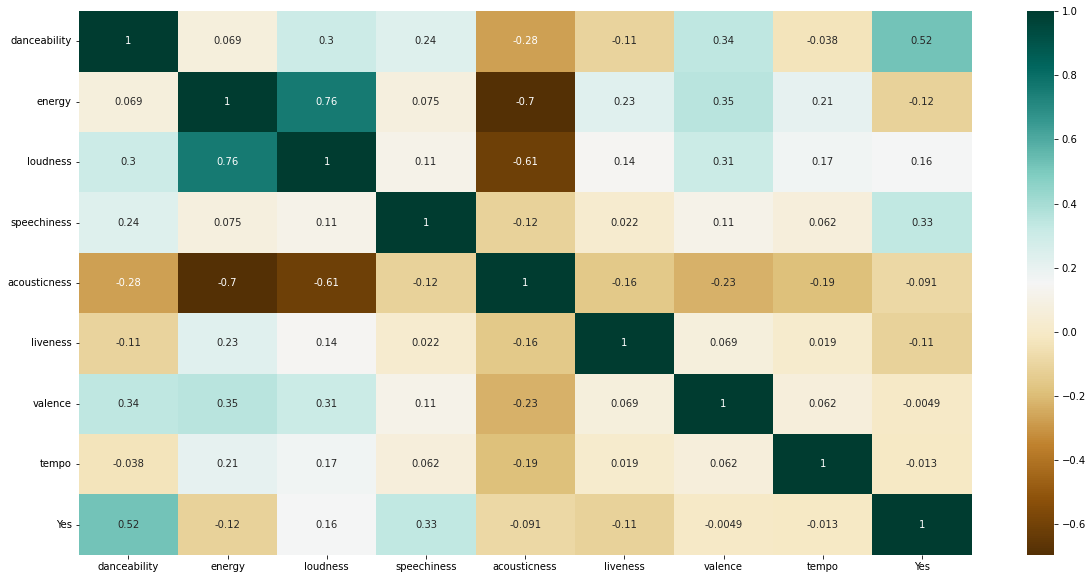

In [86]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
c = X.corr()
corr = sns.heatmap(c,cmap="BrBG",annot=True)

In [87]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.35) 
print(corr_features)

{'loudness', 'acousticness', 'valence', 'Yes'}


In [ ]:
!pip3 install sklearn

In [61]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Train / Split Data
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Yes']), X.Yes,test_size = .20)

In [94]:
# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
np.mean(lr_scores)

0.69327674736536

In [95]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 20}

In [96]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=20)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

0.8302833584488116

In [97]:
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

{'max_depth': 20, 'n_estimators': 20}

In [101]:
# Cross-validation for RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 20))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)
rf.fit(X_train,y_train)

Pipeline(steps=[('rf', RandomForestClassifier(max_depth=20, n_estimators=20))])

In [ ]:
PREDICTING SCORES

In [69]:
test_songs = call_playlist("corneliuspau", "https://open.spotify.com/playlist/6NuLLsgMGulGVz2L3gAgDC?si=ec8905f58b164dc2")

In [70]:
test_songs.head(10)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,A$AP Ferg,Floor Seats II,In It (feat. Latto),2GDFfYpuDzUjB7gYtNbR8n,0.833,0.571,10,-6.156,0,0.3800,0.1080,0.000019,0.1800,0.906,75.043,118440,4
1,Justin Bieber,My World 2.0,Baby,6epn3r7S14KUqlReYr77hA,0.728,0.859,5,-5.237,0,0.1370,0.0401,0.000000,0.1110,0.535,65.043,214240,4
2,Drake,More Life,Portland,2bjwRfXMk4uRgOD9IBYl9h,0.925,0.443,1,-8.216,1,0.2640,0.0172,0.000000,0.2760,0.350,136.078,236615,4
3,One Direction,Made In The A.M. (Deluxe Edition),Drag Me Down,2K87XMYnUMqLcX3zvtAF4G,0.730,0.703,0,-5.672,0,0.0369,0.1090,0.000000,0.0657,0.595,138.113,192120,4
4,"Tyler, The Creator",CALL ME IF YOU GET LOST,WUSYANAME (feat. Youngboy Never Broke Again & ...,5B0kgjHULYJhAQkK5XsMoC,0.493,0.653,0,-5.666,0,0.0466,0.2690,0.000000,0.5110,0.852,142.347,121573,4
5,Drake,The Best In The World Pack,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,0.831,0.502,10,-4.045,0,0.0460,0.1010,0.000000,0.1220,0.101,100.541,205427,4
6,Childish Gambino,Kauai,Sober,7JRxU6iBw0nsgdnDlfBgP0,0.701,0.592,0,-6.646,1,0.0301,0.1010,0.000025,0.5510,0.421,98.067,252013,4
7,Rae Sremmurd,SremmLife,This Could Be Us,4jTiyLlOJVJj3mCr7yfPQD,0.732,0.690,0,-4.992,0,0.1340,0.2910,0.000000,0.1160,0.758,143.072,206307,4
8,Rae Sremmurd,SremmLife,Come Get Her,1Ser4X0TKttOvo8bgdytTP,0.689,0.564,2,-6.226,1,0.1360,0.1870,0.000000,0.0721,0.123,185.023,212947,4
9,Childish Gambino,Because the Internet,3005,2ZltjIqztEpZtafc8w0I9t,0.472,0.448,6,-7.272,0,0.3260,0.1130,0.000000,0.0914,0.636,166.077,234215,4


In [103]:
prediction = rf.predict(test_songs.drop(columns=['track_name','album','artist','key','mode','time_signature', 'track_id']))

In [104]:
prediction

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [105]:
test_songs['prediction'] = prediction

In [106]:
test_songs

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,prediction
0,A$AP Ferg,Floor Seats II,In It (feat. Latto),2GDFfYpuDzUjB7gYtNbR8n,0.833,0.571,10,-6.156,0,0.3800,0.10800,0.000019,0.1800,0.906,75.043,118440,4,0
1,Justin Bieber,My World 2.0,Baby,6epn3r7S14KUqlReYr77hA,0.728,0.859,5,-5.237,0,0.1370,0.04010,0.000000,0.1110,0.535,65.043,214240,4,1
2,Drake,More Life,Portland,2bjwRfXMk4uRgOD9IBYl9h,0.925,0.443,1,-8.216,1,0.2640,0.01720,0.000000,0.2760,0.350,136.078,236615,4,1
3,One Direction,Made In The A.M. (Deluxe Edition),Drag Me Down,2K87XMYnUMqLcX3zvtAF4G,0.730,0.703,0,-5.672,0,0.0369,0.10900,0.000000,0.0657,0.595,138.113,192120,4,1
4,"Tyler, The Creator",CALL ME IF YOU GET LOST,WUSYANAME (feat. Youngboy Never Broke Again & ...,5B0kgjHULYJhAQkK5XsMoC,0.493,0.653,0,-5.666,0,0.0466,0.26900,0.000000,0.5110,0.852,142.347,121573,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Macklemore & Ryan Lewis,The Heist,Can't Hold Us - feat. Ray Dalton,3bidbhpOYeV4knp8AIu8Xn,0.641,0.922,2,-4.457,1,0.0786,0.02910,0.000000,0.0862,0.847,146.078,258343,4,0
197,Far East Movement,Free Wired,Like A G6,4DvhkX2ic4zWkQeWMwQ2qf,0.435,0.837,3,-8.126,1,0.4490,0.00676,0.000000,0.1170,0.778,124.913,216893,4,0
198,iLOVEFRiDAY,I Love Friday,Travel Ban,0U0DggJOVTSXqI01e0xegS,0.926,0.400,1,-9.750,1,0.6330,0.00921,0.000025,0.1090,0.378,120.992,102243,3,1
199,Mike Posner,Cooler Than Me EP,Cooler Than Me (feat. Big Sean),2DPYlWl50ydYsnnuryL5aX,0.837,0.515,7,-4.065,0,0.0793,0.10300,0.000000,0.2330,0.769,129.001,227840,4,1
